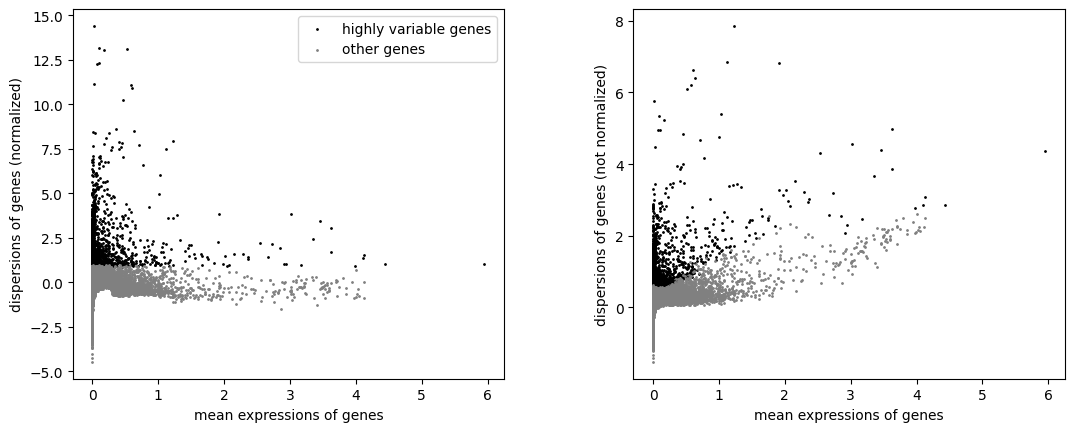

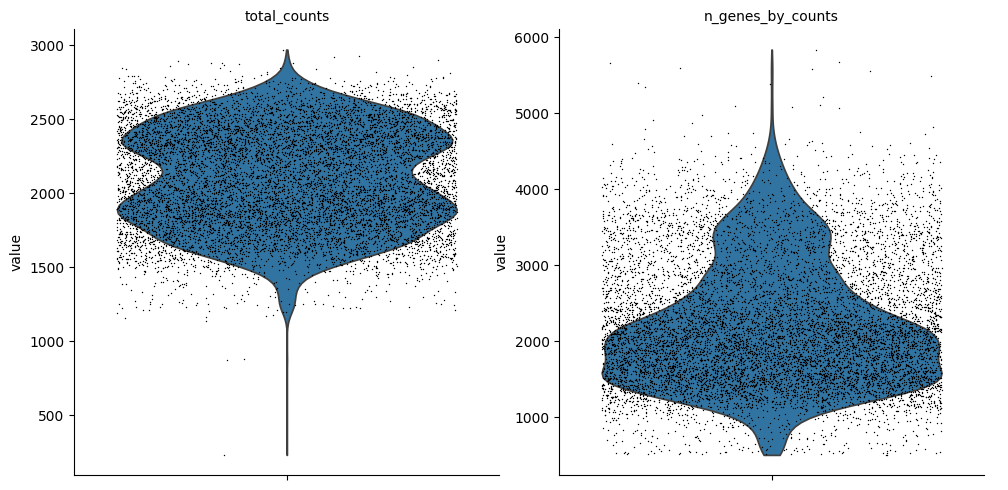

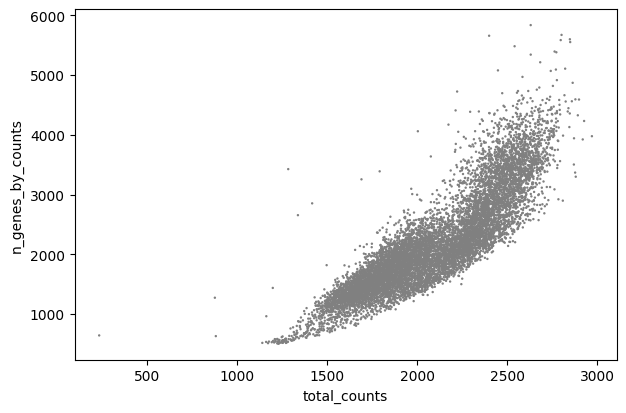

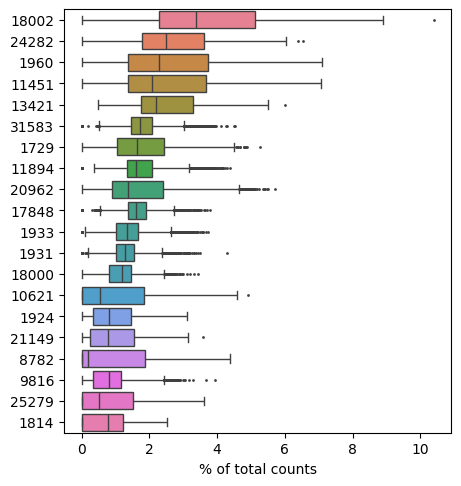

In [11]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import gc
# Load single-cell RNA-seq data from week1
adata=sc.read_h5ad(r"C:\Users\杨怡鹤\Desktop\CandiceY\Convoloo\single_cell_data.h5ad")
adata.raw=adata

# Normalize raw gene expression to medium total counts
sc.pp.normalize_total(adata)

#Log-transform the data (log1p)
sc.pp.log1p(adata)

#calculate QC metrics and add them to adata.obs and adata.var
sc.pp.calculate_qc_metrics(adata, inplace=True) #important to save the QC metrics in adata.obs and adata.var 

# Identify Highly Variable Genes (HVGs)
#print("adata.obs colums:", adata.obs.columns.tolist()) #to see if there is a batch column for cells
#print("adate Batch information", adata.obs['Batch'].value_counts) #to see the batch information
sc.pp.highly_variable_genes(adata,n_top_genes=2000,batch_key='Batch') #choose top 2000 HVGs and save it to adata.var
sc.pl.highly_variable_genes(adata) #do not work on its own to choose HVGs,just show the result visually
adata_HVG=adata[:,adata.var['highly_variable']].copy() #subset the adata to only include HVGs(Filter to retain only HVGs)


#Randomly select ~10,000 cells using numpy
subset_idx = np.random.choice(adata_HVG.n_obs, 10000, replace=False) #replace=False means no duplicate cells

#Create a new AnnData object for plotting: 
adata_sub = adata_HVG[subset_idx,:].copy()

#Violin plots of `total_counts` and `n_genes_by_counts
sc.pl.violin(adata_sub, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

#Scatter plot
sc.pl.scatter(adata_sub, x='total_counts', y='n_genes_by_counts')

# Plot top expressed genes
sc.pl.highest_expr_genes(adata_sub, n_top=20,show=True)


